In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

making a new random classification dataset of our own where samples are rows classes are output labels weights are assignend to keep the data balanced 

In [67]:
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples = 2000 , n_classes = 2, weights = [1,1], random_state=1)  #weights are assigned so that it becomes a balanced dataset

In [68]:
X.shape  # 2000 rows and 20 features

(2000, 20)

In [69]:
y.shape

(2000,)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [71]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Random forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
ytrain_pred = rf.predict_proba(X_train)
print('RF train roc score {}'.format(roc_auc_score(y_train,ytrain_pred[:,1]))) #we are only taking the last column i.e 0 then we will apply threshold on that column to check whether the values are less or greater than 0.5 that is why we wont be needing our first column because the work can be done on either of two


RF train roc score 1.0


predict_proba() is used to predict the probabiltites of the classes i.e what is the probabilty that it belongs to class 1 or class 0

In [73]:
ytrain_pred #we have columns for class 1 and 0 respectively

array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.01, 0.99],
       ...,
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.25, 0.75]])

if value is greater than 0 consider it as 1 and if less than 0 consider it as 0

In [74]:
ytest_pred = rf.predict_proba(X_test)
print('RF test roc score {}'.format(roc_auc_score(y_test,ytest_pred[:,1]))) 

RF test roc score 0.981311111111111


In [75]:
ytest_pred

array([[0.01, 0.99],
       [0.98, 0.02],
       [0.02, 0.98],
       ...,
       [0.03, 0.97],
       [0.99, 0.01],
       [0.  , 1.  ]])

# Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

#for train data

ytrain_pred = lr.predict_proba(X_train)
print('RF train roc score {}'.format(roc_auc_score(y_train,ytrain_pred[:,1]))) #we are only taking the last column i.e 0 then we will apply threshold on that column to check whether the values are less or greater than 0.5 that is why we wont be needing our first column because the work can be done on either of two

#for test data

ytest_pred = lr.predict_proba(X_test)
print('RF test roc score {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train roc score 0.9863568922694498
RF test roc score 0.9885777777777777


# KNN Classifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

#for train data

ytrain_pred = knn.predict_proba(X_train)
print('RF train roc score {}'.format(roc_auc_score(y_train,ytrain_pred[:,1]))) #we are only taking the last column i.e 0 then we will apply threshold on that column to check whether the values are less or greater than 0.5 that is why we wont be needing our first column because the work can be done on either of two

#for test data

ytest_pred = knn.predict_proba(X_test)
print('RF test roc score {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train roc score 0.981670071491109
RF test roc score 0.9426111111111111


# ADABoost Classifier

In [47]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

#for train data

ytrain_pred = ada.predict_proba(X_train)
print('RF train roc score {}'.format(roc_auc_score(y_train,ytrain_pred[:,1]))) #we are only taking the last column i.e 0 then we will apply threshold on that column to check whether the values are less or greater than 0.5 that is why we wont be needing our first column because the work can be done on either of two

#for test data

ytest_pred = ada.predict_proba(X_test)
print('RF test roc score {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train roc score 0.9975081174960356
RF test roc score 0.9826111111111111


### Focus on selecting the best threshold value for max accuracy

In [78]:
pred = []

#appending all the probabilites of all the models in  a list by taking the second column probability

for model in [rf,lr,ada,knn]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))  

pred


[0      0.99
 1      0.02
 2      0.98
 3      0.90
 4      0.52
        ... 
 595    0.02
 596    0.01
 597    0.97
 598    0.01
 599    1.00
 Length: 600, dtype: float64,
 0      0.991861
 1      0.000008
 2      0.966929
 3      0.761539
 4      0.779443
          ...   
 595    0.024239
 596    0.000003
 597    0.984385
 598    0.001147
 599    0.989540
 Length: 600, dtype: float64,
 0      0.559186
 1      0.463282
 2      0.538202
 3      0.509875
 4      0.490344
          ...   
 595    0.461121
 596    0.441377
 597    0.532403
 598    0.441720
 599    0.559890
 Length: 600, dtype: float64,
 0      1.0
 1      0.0
 2      0.8
 3      0.8
 4      0.4
       ... 
 595    0.0
 596    0.0
 597    1.0
 598    0.2
 599    0.8
 Length: 600, dtype: float64]

In [79]:
#concatenating all the series into the dataframe where the columns of df represent the models' name for eg rf=0, lr=1, ada=2, knn=3 

df_final = pd.concat(pred, axis=1) 
df_final

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.02,0.000008,0.463282,0.0
2,0.98,0.966929,0.538202,0.8
3,0.90,0.761539,0.509875,0.8
4,0.52,0.779443,0.490344,0.4
...,...,...,...,...
595,0.02,0.024239,0.461121,0.0
596,0.01,0.000003,0.441377,0.0
597,0.97,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [87]:
df_final_mean = df_final.mean(axis=1) #taking mean on the axis
df_final_mean

0      0.885262
1      0.120823
2      0.821283
3      0.742853
4      0.547447
         ...   
595    0.126340
596    0.112845
597    0.871697
598    0.163217
599    0.837357
Length: 600, dtype: float64

In [88]:
print('Test ROC Score {}'.format(roc_auc_score(y_test,df_final_mean)))

Test ROC Score 0.9846333333333334


## Calculate the ROC Curve

In [89]:
fpr, tpr, thresholds = roc_curve(y_test, df_final_mean)
# Print the threshold values
thresholds

array([1.9134413 , 0.9134413 , 0.90656694, 0.90577475, 0.81198866,
       0.81162833, 0.79380736, 0.7930558 , 0.78140513, 0.78071156,
       0.76586354, 0.76537124, 0.72402563, 0.71887362, 0.70847576,
       0.70393711, 0.65942282, 0.65743537, 0.61494697, 0.60864346,
       0.5896569 , 0.58925354, 0.58156376, 0.57550386, 0.55308969,
       0.54969563, 0.54744674, 0.54486186, 0.54095371, 0.52127948,
       0.50615858, 0.49866892, 0.45200602, 0.38318654, 0.37879719,
       0.35183098, 0.34586612, 0.24154122, 0.23640421, 0.2296341 ,
       0.22896893, 0.20438001, 0.20348417, 0.12052718, 0.1203351 ,
       0.10632697])

In [94]:
from sklearn.metrics import accuracy_score

accuracy = []

for thres in thresholds:
    y_pred = np.where(df_final_mean > thres,1,0) # for all predictions made if its greater than 0.5 then covert to 1 else just convert into 0
    accuracy.append(accuracy_score(y_test, y_pred, normalize = True)) #append the accuracy in the list


In [95]:
# Now making the list into the dataframe

accuracy = pd.concat([pd.Series(thresholds), pd.Series(accuracy)], axis = 1)

accuracy.columns = ['thresholds','accuracy']
accuracy.sort_values(by = 'accuracy', ascending = False, inplace = True)

In [96]:
accuracy #the threshold with highest accuracy is selected

,thresholds,accuracy
32,0.452006,0.961667
31,0.498669,0.958333
25,0.549696,0.958333
30,0.506159,0.956667
29,0.521279,0.956667
27,0.544862,0.956667
26,0.547447,0.956667
24,0.553090,0.956667
28,0.540954,0.955000
23,0.575504,0.951667


## plotting the curve

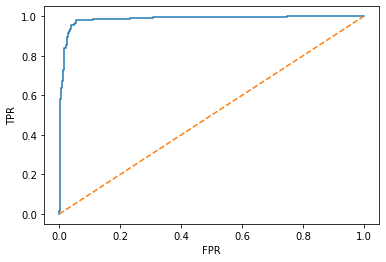

In [97]:
def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr, label = 'ROC')
    plt.plot([0,1], [0,1], linestyle = '--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
 
plot_roc(fpr,tpr)